In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Вивести перші рядки таблиці за допомогою методу head
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [3]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
rows, columns = df.shape
print(rows)
print(columns)

28
9


In [4]:
#Замініть у таблиці значення "—" на значення NaN
df.replace("—",np.nan, inplace=True)
print(df)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [5]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [6]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df = df.apply(pd.to_numeric,errors = "ignore" )
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [7]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
sum = df.isnull().sum()
sum

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [8]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.drop(df.index[-1])
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [12]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = df.fillna({"1950":df["1950"].mean(),"1960":df["1960"].mean(),"1970":df["1970"].mean(),"1990":df["1990"].mean(),"2000":df["2000"].mean(),"2012":df["2012"].mean(),"2014":df["2014"].mean(),"2019":df["2019"].mean(),})
print(df)

               Регіон    1950       1960  1970  1990  2000  2012    2014  \
0                Крим  23.000  20.600000  16.0  13.0   7.3  12.6  11.144   
1           Вінницька  22.400  19.200000  14.2  12.4   8.4  11.2  10.900   
2           Волинська  24.700  25.000000  17.9  15.3  11.2  14.8  14.100   
3    Дніпропетровська  20.400  20.400000  15.1  12.3   7.1  11.2  11.100   
4            Донецька  27.100  21.400000  14.0  10.9   6.1   9.8   8.200   
5         Житомирська  26.100  22.300000  15.9  12.9   8.9  12.2  12.000   
6        Закарпатська  31.400  27.300000  20.7  16.8  11.5  15.1  14.600   
7          Запорізька  21.900  19.700000  15.0  12.4   7.1  10.6  10.600   
8   Івано-Франківська  24.300  24.800000  18.2  15.5  10.3  12.4  12.200   
9            Київська  20.400  18.900000  15.6  12.3   7.3  12.2  12.100   
10     Кіровоградська  21.600  17.100000  14.5  12.6   7.9  11.0  10.800   
11          Луганська  26.200  23.500000  14.4  11.6   6.2   9.6   5.100   
12          

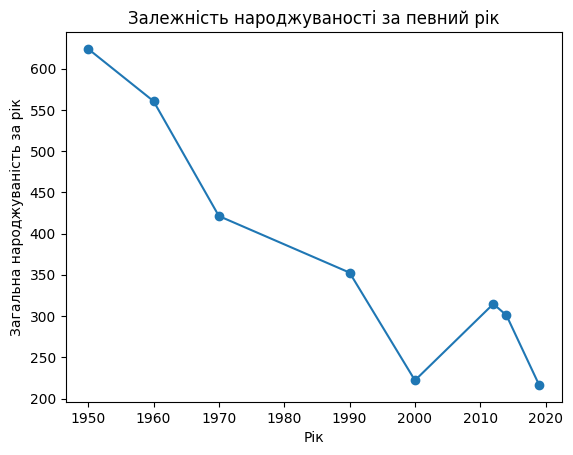

In [18]:
years = [1950, 1960, 1970, 1990, 2000, 2012, 2014,2019]
sum_lable_x = [df['1950'].sum(),df['1960'].sum(),df['1970'].sum(),df['1990'].sum(),df['2000'].sum(),df['2012'].sum(),df['2014'].sum(),df['2019'].sum()]
plt.plot(years, sum_lable_x, marker='o')
plt.title('Залежність народжуваності за певний рік')
plt.xlabel('Рік')
plt.ylabel('Загальна народжуваність за рік')
plt.show()

([<matplotlib.patches.Wedge at 0x1c915ccdd10>,
 [Text(1.1048979443605322, 0.775693581608015, '1950'),
  Text(-0.37463671421762995, 1.296976226597935, '1960'),
  Text(-1.319062898132892, 0.28735530405624304, '1970'),
  Text(-1.1149485061773747, -0.7611766080042403, '1990'),
  Text(-0.485060251051038, -1.2598478292437956, '2000'),
  Text(0.2440790767046842, -1.3277520116026897, '2012'),
  Text(0.9725249656109923, -0.9363200260932895, '2014'),
  Text(1.3151918593458816, -0.304582292837787, '2019')],
 [Text(0.9412093600108237, 0.6607760139623832, '19.48%'),
  Text(-0.319134978777981, 1.1048316004352778, '19.98%'),
  Text(-1.1236461724835747, 0.24478414789976258, '14.24%'),
  Text(-0.9497709497066523, -0.648409703114723, '11.66%'),
  Text(-0.41319947311755084, -1.0732037063928628, '7.58%'),
  Text(0.20791921348917541, -1.1310480098837725, '9.91%'),
  Text(0.8284471929278823, -0.7976059481535427, '9.91%'),
  Text(1.1203486209242692, -0.25945899019515184, '7.24%')])

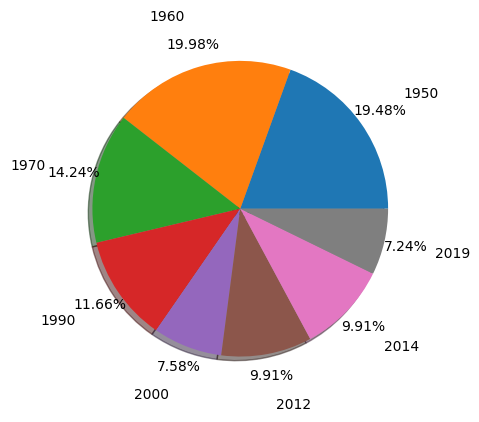

In [41]:
years = df.columns[1:].tolist()
lviv_birth_rate = df[df["Регіон"] == "Львівська"].values.flatten().tolist()
lviv_birth_rate.pop(0)
plt.pie(
    lviv_birth_rate,
    labels=years,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

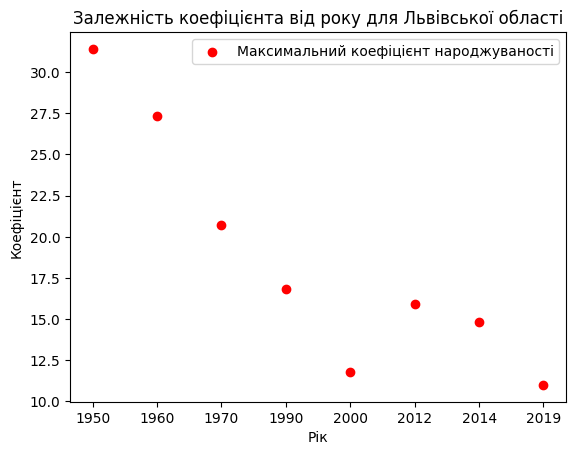

In [44]:
max_values = df.iloc[:, 1:].max(axis=0)
years = df.columns[1:]
plt.scatter(x=years, y=max_values, color='red', label='Максимальний коефіцієнт народжуваності')
plt.title('Залежність коефіцієнта від року для Львівської області')
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт')
plt.legend()
plt.show()

In [121]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
result = df[df["2019"]>df["2019"].mean()]
result_to_list = result["Регіон"].tolist()
print(result_to_list)

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [134]:
#У якому регіоні була найвища народжуваність у 2014 році?
higest_bd = df.loc[df["2014"].idxmax(), "Регіон"]
print(higest_bd)

Рівненська


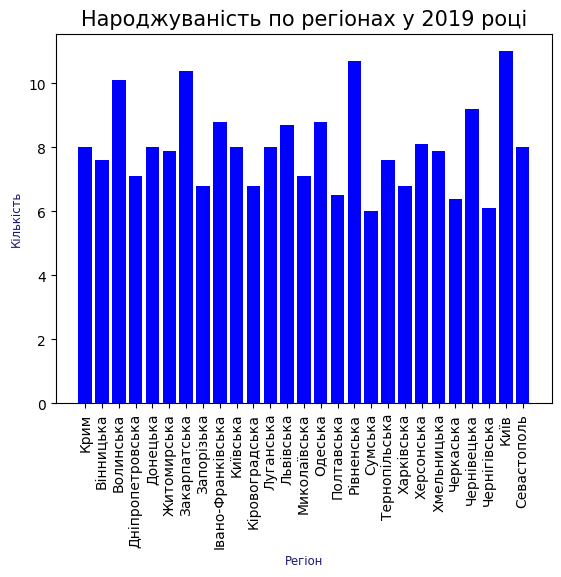

In [137]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
plt.bar(
    df["Регіон"],df["2019"],color="blue"
)
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Кількість", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах у 2019 році", fontsize=15)
plt.xticks(rotation=90)
plt.show()